Enrico Grandi, Enrico Romano, Simone Lu, Lorenzo Antolini

# Task 0



In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from collections import Counter
warnings.filterwarnings('ignore')

In [36]:
df_cb = pd.read_csv("clicks_bidding.csv")
df_cr = pd.read_csv("clicks_regular.csv")
df_pr_co = pd.read_csv("prices_competitor.csv")
df_pr_ca = pd.read_csv("product_catalog.csv") 
df_sd = pd.read_csv("sales_data.csv") 
df_sl = pd.read_csv("sellers_list.csv") 
df_st = pd.read_csv("stock.csv") 

# 1 -  Sales data

- It tracks all the purchases made by customers.

- On 2021-01-02 the product corresponding 
to the product_id 110853 has been 
purchased once (for a single transaction) 
by a customer (including taxes) at the 
price of 3990.
The regular price and the sales price are 
different if there are promotions or 
marketing campaigns for that product at 
that time

- Cleaning


![image.png](attachment:image.png)

In [37]:
#new columns

df_sd["sales_tax"] = ((df_sd["sales_price_tax"]-df_sd["sales_price"])/df_sd["sales_price_tax"])
df_sd["regular_tax"] = ((df_sd["regular_price_tax"]-df_sd["regular_price"])/df_sd["regular_price_tax"])
df_sd["gross_profit"] = ((df_sd["sales_price_tax"]-df_sd["purchase_price"])/df_sd["sales_price_tax"])
df_sd["month"] = [str(x)[5:7] for x in df_sd["sale_date"]]

df_sd["profit"] = df_sd["sales_price"] - df_sd["purchase_price"]
df_sd["revenue"] = df_sd["sales_price"] * df_sd["quantity"]

df_sd["promotion_perc"] = df_sd["regular_price"] - df_sd["sales_price"]/ df_sd['regular_price'] *100

df_sd

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,sales_tax,regular_tax,gross_profit,month,profit,revenue,promotion_perc
0,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.70000,0.166667,0.166644,0.289799,01,491.30000,3325.0,6887.241275
1,2021-01-03,157318,1,4590.0,12211.0,3825.0,10175.9259,3481.20000,0.166667,0.166659,0.241569,01,343.80000,3825.0,10138.337183
2,2021-01-04,107645,3,1990.0,4433.0,1658.0,3694.4444,1369.29000,0.166834,0.166604,0.311915,01,288.71000,4974.0,3649.566204
3,2021-01-04,110853,12,3990.0,8322.0,3325.0,6935.1852,2833.70000,0.166667,0.166644,0.289799,01,491.30000,39900.0,6887.241275
4,2021-01-04,110908,1,4490.0,7767.0,3742.0,6472.2222,3722.00000,0.166592,0.166702,0.171047,01,20.00000,3742.0,6414.405891
5,2021-01-04,112376,3,379.0,544.0,316.0,453.7037,168.97000,0.166227,0.165986,0.554169,01,147.03000,948.0,384.054720
6,2021-01-04,112377,1,849.0,1322.0,708.0,1101.8519,545.61100,0.166078,0.166527,0.357349,01,162.38900,708.0,1037.596441
7,2021-01-04,112437,1,6999.0,9443.0,5832.0,7869.4444,5086.06480,0.166738,0.166637,0.273316,01,745.93520,5832.0,7795.334975
8,2021-01-04,122363,3,6990.0,15544.0,5825.0,12953.7037,4924.00000,0.166667,0.166643,0.295565,01,901.00000,17475.0,12908.735866
9,2021-01-04,124329,2,2915.5,3332.0,2429.5,2776.8519,1600.00000,0.166695,0.166611,0.451209,01,829.50000,4859.0,2689.360738


In [38]:
# check for null values
1-(len(df_sd.isna()))/len(df_sd)


0.0

In [39]:
# converting datatype

df_sd['sales_price'] = df_sd['sales_price'].values.astype('float64')
df_sd['regular_price'] = df_sd['regular_price'].values.astype('float64')
df_sd['purchase_price'] = df_sd['purchase_price'].values.astype('float64')
df_sd['profit'] = df_sd['profit'].values.astype('float64')

In [40]:
feature_list = ['sales_price','regular_price','purchase_price','profit'] 

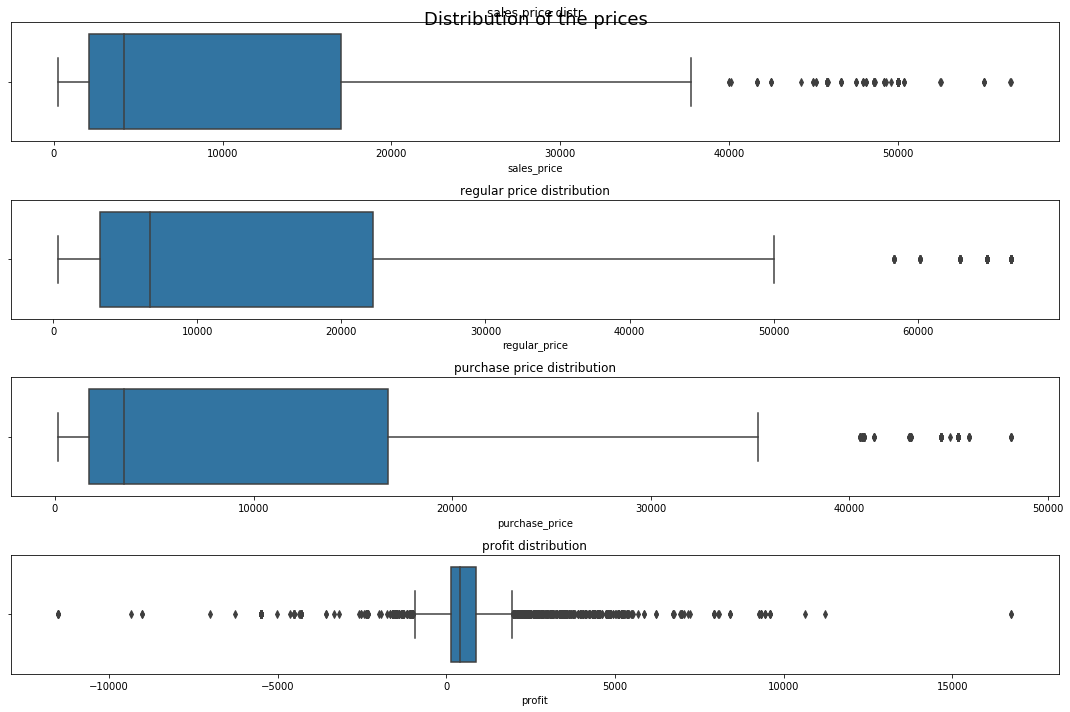

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,10))
fig.suptitle('Distribution of the prices\n', size = 18)

sns.boxplot(df_sd['sales_price'], ax=axes[0], orient= "h")
axes[0].set_title("sales price distr");

sns.boxplot(df_sd['regular_price'], ax=axes[1], orient= "h")
axes[1].set_title("regular price distribution");

sns.boxplot(df_sd['purchase_price'], ax=axes[2], orient= "h")
axes[2].set_title("purchase price distribution");

sns.boxplot(df_sd['profit'], ax = axes[3], orient= "h")
axes[3].set_title("profit distribution");



plt.tight_layout()

## Tukey's IQR method

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

In [42]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [43]:
Outliers_IQR = IQR_method(df_sd,1,feature_list)

Total number of outliers is: 874


In [44]:
# drop outliers

df_out = df_sd.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [45]:
df_out.head()

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,sales_tax,regular_tax,gross_profit,month,profit,revenue,promotion_perc
0,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.70,0.166667,0.166644,0.289799,01,491.30,3325.0,6887.241275
1,2021-01-03,157318,1,4590.0,12211.0,3825.0,10175.9259,3481.20,0.166667,0.166659,0.241569,01,343.80,3825.0,10138.337183
2,2021-01-04,107645,3,1990.0,4433.0,1658.0,3694.4444,1369.29,0.166834,0.166604,0.311915,01,288.71,4974.0,3649.566204
3,2021-01-04,110853,12,3990.0,8322.0,3325.0,6935.1852,2833.70,0.166667,0.166644,0.289799,01,491.30,39900.0,6887.241275
4,2021-01-04,110908,1,4490.0,7767.0,3742.0,6472.2222,3722.00,0.166592,0.166702,0.171047,01,20.00,3742.0,6414.405891


In [46]:
# grouping operations for a better view of the dataset

df_sd_grouped = df_sd.groupby(["product_id", "sale_date"]).agg({
    "quantity":"sum",
    "sales_price_tax":["mean","max","min"],
    "regular_price_tax":["mean","max","min"],
    "sales_price":["mean","max","min"],
    "regular_price":["mean","max","min"],
    "purchase_price":["mean","max","min"],
    "sales_tax":["mean"],
    "gross_profit":["mean","max","min"],
})


df_sd_grouped.columns = [
                        'quantity_count',
                        'sales_price_tax_mean',
                        'sales_price_tax_max',
                        'sales_price_tax_min',
                        'regular_price_tax_mean',
                        'regular_price_tax_max',
                        'regular_price_tax_min',
                        'sales_price_mean',
                        'sales_price_max',
                        'sales_price_min',
                        'regular_price_mean',
                        'regular_price_max',
                        'regular_price_min',
                        'purchase_price_mean',
                        'purchase_price_max',
                        'purchase_price_min',
                        'sales_tax_mean',
                        'gross_profit_mean',
                        'gross_profit_max',
                        'gross_profit_min',
                        ]

df_sd_grouped

quantity_count  sales_price_tax_mean  \
product_id sale_date                                          
103851     2021-01-06               2                1190.0   
           2021-01-08               3                1190.0   
           2021-01-11               1                1190.0   
           2021-01-12               1                1190.0   
           2021-01-13               3                1190.0   
           2021-01-14               2                1190.0   
           2021-01-15               2                1190.0   
           2021-01-18               1                1190.0   
           2021-01-19               1                1190.0   
           2021-01-22               1                1190.0   
           2021-01-27               1                1190.0   
           2021-01-29               1                1190.0   
           2021-02-01               1                1190.0   
           2021-02-12               1                1190.0   
           2021-02-22               1                1190.0   
           2021-02-23               5                1190.0   
           2021-02-24               1                1190.0   
           2021-02-27               3                 992.0   
           2021-02-28               1                 992.0   
           2021-03-01               3                 992.0   
           2021-03-02               1                1190.0   
           2021-03-03               2                1190.0   
           2021-03-04               2                 992.0   
           2021-03-05               2                 992.0   
           2021-03-08               2                1190.0   
           2021-03-09               3                1190.0   
           2021-03-11               1                1190.0   
           2021-03-12               1                1190.0   
           2021-03-15               2                1090.0   
           2021-03-17               4                 990.0   
...                               ...                   ...   
177925     2021-12-01               6                8990.0   
           2021-12-02               3                9990.0   
           2021-12-03               2                9490.0   
           2021-12-04               4                9990.0   
           2021-12-05               1                9990.0   
           2021-12-06               6                8990.0   
           2021-12-07              15                8990.0   
           2021-12-08              21                8990.0   
           2021-12-09              15                8990.0   
           2021-12-10              11                8990.0   
           2021-12-11               4                9490.0   
           2021-12-12               3                9990.0   
           2021-12-13              28                8990.0   
           2021-12-14              11                8990.0   
           2021-12-15              13                9990.0   
           2021-12-16              15                8990.0   
           2021-12-17               3                9990.0   
           2021-12-18               1                9990.0   
           2021-12-20              18                8990.0   
           2021-12-21              12                8990.0   
           2021-12-22               5                8990.0   
           2021-12-23               7                9990.0   
           2021-12-24               5                9990.0   
           2021-12-25               2                9990.0   
           2021-12-26               2                9990.0   
           2021-12-27              18                9990.0   
           2021-12-28               7                9990.0   
           2021-12-29               4                9990.0   
           2021-12-30               7                9990.0   
           2021-12-31              15                9990.0   

                       sales_price_tax_max  sales_pri

# 2 - Product Catalog
- This is the product database. All information must be present here: 
- Price
- Who is the seller? 
- Average click cost 
- Number of click 

![image.png](attachment:image.png)
 

In [47]:
df_pr_ca = df_pr_ca.set_index("product_id")
df_pr_ca.head()

,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name
product_id,,,,,
143226,2259,1412,1412,522,2719
106100,2880,2856,1169,309,1937
149306,2880,2856,4877,455,3618
160649,624,2291,601,543,2194
124455,1676,2193,2409,289,3120


In [48]:
# check for null value
1-(len(df_pr_ca.isna()))/len(df_pr_ca)

0.0

### Here it is a merge of the two datasets: sales data + product categories, because you have to math the catalogue information with the sales transaction data.

In [49]:
#merge with price
df_pr_cad = df_pr_ca.merge(df_sd_grouped, left_index=True, right_index=True).reset_index()
df_pr_cad

,product_id,sale_date,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,regular_price_mean,regular_price_max,regular_price_min,purchase_price_mean,purchase_price_max,purchase_price_min,sales_tax_mean,gross_profit_mean,gross_profit_max,gross_profit_min
0,103851,2021-01-06,2259,944,1867,367,2979,2,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
1,103851,2021-01-08,2259,944,1867,367,2979,3,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
2,103851,2021-01-11,2259,944,1867,367,2979,1,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
3,103851,2021-01-12,2259,944,1867,367,2979,1,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
4,103851,2021-01-13,2259,944,1867,367,2979,3,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
5,103851,2021-01-14,2259,944,1867,367,2979,2,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
6,103851,2021-01-15,2259,944,1867,367,2979,2,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
7,103851,2021-01-18,2259,944,1867,367,2979,1,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
8,103851,2021-01-19,2259,944,1867,367,2979,1,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998
9,103851,2021-01-22,2259,944,1867,367,2979,1,1190.0,1190.0,...,991.6667,991.6667,991.6667,773.502600,773.502600,773.502600,0.166387,0.349998,0.349998,0.349998


In [50]:
# gruping sales data and product catalog for the 3 sub category

df_pr_cad_xcat = df_pr_cad.groupby(["sale_date","coded_cat1","coded_cat2","coded_cat3"]).agg({
    "quantity_count":"count",
    "sales_price_tax_mean":"mean",
    "regular_price_tax_mean":"mean",
    "sales_price_mean":"mean",
    "regular_price_mean":"mean",
    "purchase_price_mean":"mean",
    "sales_tax_mean":"mean",
    "gross_profit_mean":"mean",
})

df_pr_cad_xcat.columns = ['sub_quantity_count',
                          'sub_sales_price_tax_mean',
                          'sub_regular_price_tax_mean',
                           'sub_sales_price_mean',
                          'sub_regular_price_mean', 
                          'sub_purchase_price_mean',
                           'sub_sales_tax_mean', 
                          'sub_gross_profit_mean']
df_pr_cad_xcat

sub_quantity_count  \
sale_date  coded_cat1 coded_cat2 coded_cat3                       
2021-01-02 2259       2015       493                          1   
2021-01-03 2259       1714       647                          1   
2021-01-04 1676       2005       2467                         2   
                      2193       2401                         1   
                                 2409                         2   
                      2832       1011                         1   
           2180       834        3016                         1   
           2259       944        1753                         1   
                                 1763                         3   
                      1412       1412                         1   
                      1714       647                          1   
                                 720                          1   
                                 724                          1   
                                 805                          2   
                                 900                          1   
                                 2353                         3   
                      2015       493                          1   
           2880       2856       4877                         1   
2021-01-05 2259       2015       493                          1   
2021-01-06 1676       2005       2467                         2   
                      2193       2401                         1   
                                 2409                         2   
                      2832       1011                         1   
           2259       944        1753                         1   
                                 1763                         3   
                                 1867                         1   
                      1412       1412                         1   
                      1714       647                          1   
                                 720                          1   
                                 805                          1   
...                                                         ...   
2021-12-30 2259       944        1753                         2   
                                 1867                         1   
                      1412       1412                         1   
                      1714       647                          1   
                                 720                          1   
                                 805                          1   
                                 900                          1   
                                 2353                         2   
                                 2431                         1   
                                 2633                         1   
2021-12-31 624        2291       601                          1   
           885        1069       490                          2   
           1375       2519       2668                         1   
           1676       2832       1011                         1   
           2180       613        2175                         1   
                                 2275                         1   
                      834        3016                         1   
           2259       944        1753                         2   
                                 1763                         1   
                                 1867                         2   
                      1412       1412                         1   
                      1714       647                          1   
                                 720                          1   
                                 724                          2   
                                 746                          1   
                                 805                          1   
                                 900                          1   
                         

In [51]:
df_pr_cad.set_index(["sale_date","coded_cat1","coded_cat2","coded_cat3"])
df_pr_cad = df_pr_cad.set_index(["sale_date","coded_cat1","coded_cat2","coded_cat3"]).merge(df_pr_cad_xcat, left_index=True, right_index=True)

In [52]:
df_pr_cad = df_pr_cad.reset_index()
df_pr_cad

,sale_date,coded_cat1,coded_cat2,coded_cat3,product_id,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,gross_profit_max,gross_profit_min,sub_quantity_count,sub_sales_price_tax_mean,sub_regular_price_tax_mean,sub_sales_price_mean,sub_regular_price_mean,sub_purchase_price_mean,sub_sales_tax_mean,sub_gross_profit_mean
0,2021-01-02,2259,2015,493,110853,522,1709,1,3990.0,3990.0,...,0.289799,0.289799,1,3990.000000,8322.000000,3325.000000,6935.185200,2833.700000,0.166667,0.289799
1,2021-01-03,2259,1714,647,157318,522,1825,1,4590.0,4590.0,...,0.241569,0.241569,1,4590.000000,12211.000000,3825.000000,10175.925900,3481.200000,0.166667,0.241569
2,2021-01-04,1676,2005,2467,128194,289,2994,6,20438.0,20438.0,...,0.113706,0.113706,2,23714.000000,33327.500000,19762.000000,27772.685200,19107.039550,0.166652,0.184493
3,2021-01-04,1676,2005,2467,156474,367,2949,1,26990.0,26990.0,...,0.255280,0.255280,2,23714.000000,33327.500000,19762.000000,27772.685200,19107.039550,0.166652,0.184493
4,2021-01-04,1676,2193,2401,154557,522,2850,2,28184.0,28184.0,...,0.236463,0.236463,1,28184.000000,32211.000000,23486.500000,26842.592600,21519.520000,0.166673,0.236463
5,2021-01-04,1676,2193,2409,124455,289,3120,4,19990.0,19990.0,...,0.194531,0.194531,2,19990.000000,25271.500000,16658.000000,21059.722250,15469.944550,0.166683,0.226116
6,2021-01-04,1676,2193,2409,154553,522,2949,3,19990.0,19990.0,...,0.257701,0.257701,2,19990.000000,25271.500000,16658.000000,21059.722250,15469.944550,0.166683,0.226116
7,2021-01-04,1676,2832,1011,128772,522,2045,2,20769.5,20769.5,...,0.214082,0.214082,1,20769.500000,24433.000000,17308.000000,20361.108300,16323.120000,0.166663,0.214082
8,2021-01-04,2180,834,3016,124329,453,2502,2,2915.5,2915.5,...,0.451209,0.451209,1,2915.500000,3332.000000,2429.500000,2776.851900,1600.000000,0.166695,0.451209
9,2021-01-04,2259,944,1753,131910,542,3352,1,7990.0,7990.0,...,0.230548,0.230548,1,7990.000000,11110.000000,6658.000000,9258.333300,6147.921500,0.166708,0.230548


# 3 - Stock 
![image.png](attachment:image.png)

In [53]:
df_st.head()

,stock_date,product_id,total_stock
0,2021-04-16,161147,216
1,2021-02-21,142254,80
2,2021-01-05,134200,620
3,2021-10-25,143220,532
4,2021-02-23,128194,146


In [54]:
# check for null value in dataset
1-(len(df_st.isna()))/len(df_st)

0.0

In [55]:
# new index for this dataset
df_st.columns = ['sale_date', 'product_id', 'total_stock']
df_st = df_st.set_index(["sale_date","product_id"])
df_st

,,total_stock
sale_date,product_id,
2021-04-16,161147,216
2021-02-21,142254,80
2021-01-05,134200,620
2021-10-25,143220,532
2021-02-23,128194,146
2021-05-20,154557,60
2021-04-11,110675,403
2021-01-24,106100,89
2021-05-14,143226,398


### Here it is a merge of the previous merged dataset with the stock values.

In [56]:

df_pr_cad = df_pr_cad.set_index(["sale_date","product_id"]).merge(df_st, left_index=True, right_index=True).reset_index()
df_pr_cad

,sale_date,product_id,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,gross_profit_min,sub_quantity_count,sub_sales_price_tax_mean,sub_regular_price_tax_mean,sub_sales_price_mean,sub_regular_price_mean,sub_purchase_price_mean,sub_sales_tax_mean,sub_gross_profit_mean,total_stock
0,2021-04-20,154553,1676,2193,2409,522,2949,3,19823.0,19823.0,...,0.205241,1,19823.000000,23322.000000,16519.000000,19435.185200,15754.500000,0.166675,0.205241,11
1,2021-01-04,149306,2880,2856,4877,455,3618,11,17490.0,17490.0,...,0.171241,1,17490.000000,24322.000000,14575.000000,20268.518500,14495.000000,0.166667,0.171241,66
2,2021-03-27,121807,2259,1714,2633,522,2714,1,1490.0,1490.0,...,0.322503,1,1490.000000,1490.000000,1242.000000,1241.666700,1009.470000,0.166443,0.322503,121
3,2021-06-29,110908,2259,944,1763,253,2421,5,5546.0,5546.0,...,0.280022,1,5546.000000,6656.000000,4622.000000,5546.296300,3993.000000,0.166607,0.280022,470
4,2021-06-25,142254,2259,944,1763,253,2524,3,4490.0,4490.0,...,0.110616,1,4490.000000,7656.000000,3742.000000,6379.629600,3993.333300,0.166592,0.110616,335
5,2021-08-20,124455,1676,2193,2409,289,3120,1,22222.0,22222.0,...,0.245241,2,20440.000000,25549.500000,17033.000000,21291.205100,16263.372900,0.166683,0.200429,7
6,2021-10-30,132408,2259,944,1753,367,2720,1,10990.0,10990.0,...,0.151350,1,10990.000000,17767.000000,9158.000000,14805.555600,9326.664000,0.166697,0.151350,441
7,2021-11-28,143220,2259,1714,900,522,2203,1,2490.0,2490.0,...,0.312253,1,2490.000000,5544.000000,2075.000000,4620.370400,1712.490000,0.166667,0.312253,334
8,2021-03-12,112376,2259,1714,2353,522,2575,2,325.0,325.0,...,0.249000,3,894.333333,1137.000000,745.500000,947.530867,519.118833,0.166343,0.374438,1144
9,2021-09-22,157318,2259,1714,647,522,1825,1,4990.0,4990.0,...,0.302365,1,4990.000000,12211.000000,4158.000000,10175.925900,3481.200000,0.166733,0.302365,259


# 4 - Prices competitor 
contains all the prices for a specific product, for a 
specific seller and a specific date.
our client seller id is 24

- Focus on the price in each quarters

![image.png](attachment:image.png)


In [57]:
df_pr_co


,comp_date,seller_id,product_id,price
0,2021-01-01,23,112437,7999
1,2021-01-01,24,112437,8499
2,2021-01-01,26,112437,6990
3,2021-01-01,41,112437,7400
4,2021-01-01,48,112437,8499
5,2021-01-01,180,112437,7299
6,2021-01-01,188,112437,7490
7,2021-01-01,23,110675,3599
8,2021-01-01,24,110675,3649
9,2021-01-01,26,110675,3649


In [58]:
# check for null values
1-(len(df_pr_co.isna()))/len(df_pr_co)

0.0

In [59]:
# groupby operation 

df_pr_co_grouped_seller = df_pr_co.groupby(["comp_date","product_id","seller_id"]).agg({
    "price":"mean"
}).reset_index()
df_pr_co_grouped_seller

,comp_date,product_id,seller_id,price
0,2021-01-01,103851,23,1190.0
1,2021-01-01,103851,24,1190.0
2,2021-01-01,103851,26,1190.0
3,2021-01-01,103851,48,1190.0
4,2021-01-01,103851,180,1099.0
5,2021-01-01,103851,188,1190.0
6,2021-01-01,103851,407,998.0
7,2021-01-01,107645,23,1999.0
8,2021-01-01,107645,24,3990.0
9,2021-01-01,107645,26,3990.0


In [60]:
#Here the pivot is made to put the information of the sellers in the column
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller.pivot_table(values='price',columns=['seller_id'],index=["product_id","comp_date"])
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.reset_index()
df_pr_co_grouped_seller_pivot.columns = ['product_id', 'sale_date', "price_seller_23", "price_seller_24", "price_seller_26", "price_seller_41", "price_seller_48", "price_seller_180", "aprice_seller_188", "price_seller_407", "price_seller_490"]
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.set_index(["sale_date","product_id"])
df_pr_co_grouped_seller_pivot

,,price_seller_23,price_seller_24,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490
sale_date,product_id,,,,,,,,,
2021-01-01,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-02,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-03,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-04,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-05,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-06,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-07,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-08,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN
2021-01-09,103851,1190.0,1190.0,1190.0,NaN,1190.0,1099.0,1190.0,998.0,NaN


In [61]:
# fill the nan of the missing value with the mean 
c = df_pr_co_grouped_seller_pivot.filter(like='price_seller').columns
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.fillna(dict.fromkeys(c, df_pr_co_grouped_seller_pivot[c].mean(1)))
df_pr_co_grouped_seller_pivot

,,price_seller_23,price_seller_24,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490
sale_date,product_id,,,,,,,,,
2021-01-01,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-02,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-03,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-04,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-05,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-06,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-07,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-08,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429
2021-01-09,103851,1190.0,1190.0,1190.0,1149.571429,1190.0,1099.0,1190.0,998.0,1149.571429


In [62]:
df_pr_co_grouped = df_pr_co.groupby(["comp_date","product_id"]).agg({
    "price":["min","max","mean"]
}).reset_index()
df_pr_co_grouped.columns = ['sale_date', 'product_id', 'price_sellers_min', 'price_sellers_max',"price_sellers_mean"]
df_pr_co_grouped = df_pr_co_grouped.set_index(["sale_date","product_id"])
df_pr_co_grouped

price_sellers_min  price_sellers_max  \
sale_date  product_id                                         
2021-01-01 103851                    998               1190   
           107645                   1750               3990   
           110675                   2690               3690   
           110853                   3990               7490   
           110908                   4490               6990   
           112376                    490                999   
           112437                   6990               8499   
           112582                  23990              26990   
           121807                   1390               1499   
           122363                   5999              13990   
           124329                   2940               3999   
           124455                  19990              25499   
           126707                   4499               4499   
           128194                  23189              28499   
           128772                  20750              24990   
           132284                  25488              29990   
           132408                  11999              15490   
           132842                   2231               3490   
           133888                   3990               3990   
           134358                  41990              41990   
           142254                   4490               6990   
           143226                   2099               2490   
           145377                   1890               1890   
           149306                  17490              24998   
           154553                  19990              21590   
           154557                  26889              29990   
           156095                   3890               4990   
           156474                  26990              31490   
           156485                  54490              62990   
           156866                  27990              34990   
...                                  ...                ...   
2021-12-31 126707                   3499               4499   
           128194                  24249              28499   
           128772                  21769              24990   
           132284                  26397              27990   
           132408                  12437              15990   
           132842                   2490               3490   
           133888                   3990               4990   
           134358                  41990              47990   
           139935                   1190               1499   
           142254                   4868               4890   
           143226                   2290               2690   
           145377                   1890               1890   
           149301                  15199              22990   
           149306                  16790              19990   
           154553                  20799              24990   
           154557                  29273              31990   
           156095                   3690               3996   
           156485                  57889              67990   
           156866                  29900              32990   
           157316                   3990               3990   
           157317                   4990               4990   
           157318                   4990               5044   
           157913                   3619               5990   
           160649                  15999              16990   
           161147                   2990               4620   
           162101                  24990              28990   
           162102                  26990              27590   
           163385                  59999              59999   
           164725                  31990              31990   
           177925                   9990               9990   

                       price_sellers_mean  
sale_date

Losing the least number of rows from the sales data dataset (which I remember is our sales data) is crucial. Losing information of our competitors is fine, as long as it is information about products that are not present in our transactions. 

In this regard, we should now save the product ids we are going to lose to check how many of them are substitute products, based on the 3 categories.

To hit the target above we're going to do the join, which keeps all the rows in the table on the left, and merges the information with those on the right, the missing data will be nan

In [63]:
df_pr_cad = df_pr_cad.set_index(["sale_date","product_id"])
df_pr_cad = df_pr_cad.join(df_pr_co_grouped_seller_pivot)
df_pr_cad = df_pr_cad.join(df_pr_co_grouped)
df_pr_cad

,,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,sales_price_tax_min,regular_price_tax_mean,...,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490,price_sellers_min,price_sellers_max,price_sellers_mean
sale_date,product_id,,,,,,,,,,,,,,,,,,,,,
2021-04-20,154553,1676,2193,2409,522,2949,3,19823.0,19823.0,19823.0,23322.0,...,20990.000000,19400.000000,20990.000000,19949.000000,20316.500000,19391.000000,20990.000000,19391.0,20999.0,20316.500000
2021-01-04,149306,2880,2856,4877,455,3618,11,17490.0,17490.0,17490.0,24322.0,...,21890.000000,17490.000000,21890.000000,17290.000000,24998.000000,20706.714286,20706.714286,17290.0,24998.0,20706.714286
2021-03-27,121807,2259,1714,2633,522,2714,1,1490.0,1490.0,1490.0,1490.0,...,1490.000000,1477.600000,1490.000000,1419.000000,1477.600000,1477.600000,1477.600000,1419.0,1499.0,1477.600000
2021-06-29,110908,2259,944,1763,253,2421,5,5546.0,5546.0,5546.0,6656.0,...,5990.000000,5252.000000,5990.000000,5700.333333,5700.333333,4990.000000,5990.000000,4990.0,5990.0,5700.333333
2021-06-25,142254,2259,944,1763,253,2524,3,4490.0,4490.0,4490.0,7656.0,...,6125.000000,5679.000000,6125.000000,5990.000000,4890.000000,4889.000000,5798.285714,4889.0,6890.0,5798.285714
2021-08-20,124455,1676,2193,2409,289,3120,1,22222.0,22222.0,22222.0,27777.0,...,25499.000000,25499.000000,25499.000000,25999.000000,25499.000000,25499.000000,25499.000000,24999.0,25999.0,25499.000000
2021-10-30,132408,2259,944,1753,367,2720,1,10990.0,10990.0,10990.0,17767.0,...,15101.000000,12842.666667,12437.000000,12842.666667,12842.666667,12842.666667,12842.666667,10990.0,15101.0,12842.666667
2021-11-28,143220,2259,1714,900,522,2203,1,2490.0,2490.0,2490.0,5544.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-12,112376,2259,1714,2353,522,2575,2,325.0,325.0,325.0,433.0,...,390.000000,631.800000,390.000000,631.800000,990.000000,631.800000,631.800000,390.0,999.0,631.800000


# 5 - Clicks bidding
- are the data of the sellers who paid to be the top 3 on the price comparison page
- roas calculation


![image-2.png](attachment:image-2.png)

### Here as we had seen, you have to group the days, with the average, min and max. then do the 6 pivots and remove the nulls. Once done go and do the join as above

In [64]:
df_cb["date"] = [x[0:10] for x in df_cb["date"]]
df_cb = df_cb.groupby(["date","seller","product_id"]).agg({
    
    "position":["mean","min","max"],
    "price_max":"max",
    "price_min":"min",
    "price":"mean",
})

df_cb.columns = ['position_mean',
            'position_min',
            'position_max',
            'price_max',
            'price_min',
            "price"]

df_cb

position_mean  position_min  position_max  \
date       seller product_id                                              
2021-04-02 24     122363           1.000000             1             1   
                  149306           2.000000             2             2   
                  154553           2.000000             2             2   
                  156095           1.222222             1             2   
                  156474           3.000000             3             3   
                  157316           1.000000             1             1   
                  162101           2.000000             2             2   
                  162102           3.000000             3             3   
           26     110908           1.000000             1             1   
                  112376           3.000000             3             3   
                  128772           2.000000             2             2   
                  134358           2.000000             2             2   
                  157316           2.000000             2             2   
           41     128772           3.000000             3             3   
                  149301           1.000000             1             1   
                  149306           1.000000             1             1   
           48     124455           1.000000             1             1   
                  143226           3.000000             3             3   
           180    107645           1.000000             1             1   
                  112437           1.000000             1             1   
                  128194           2.000000             2             2   
                  132284           1.333333             1             2   
                  143226           2.000000             2             2   
                  149306           1.000000             1             1   
                  154553           1.250000             1             2   
                  156095           2.000000             2             2   
           490    122363           1.000000             1             1   
                  149306           1.000000             1             1   
2021-04-03 24     103851           3.000000             3             3   
                  112376           1.000000             1             1   
...                                     ...           ...           ...   
2022-01-03 48     156095           1.000000             1             1   
           407    107645           2.000000             2             2   
                  110908           3.000000             3             3   
                  128194           1.000000             1             1   
                  128772           1.000000             1             1   
                  132284           1.000000             1             1   
                  142254           1.000000             1             1   
                  143226           2.000000             2             2   
                  154557           1.000000             1             1   
                  156485           1.000000             1             1   
2022-01-04 24     107645           3.000000             3             3   
                  125506           1.000000             1             1   
                  126707           2.000000             2             2   
                  149301           2.000000             2             2   
                  149306           3.000000             3             3   
                  157317           1.000000             1             1   
                  157913           3.000000             3             3   
                  162101           2.000000             2             2   
                  162102           2.000000             2             2   
                  163385           1.000000             1             1   
                  177925           1.000000            

In [65]:
df_cb_pivot_position_mean = df_cb.pivot_table(values='position_mean',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_mean.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_mean_23",
                                 "cpc_position_mean_24", 
                                 "cpc_position_mean_26",
                                 "cpc_position_mean_41",
                                 "cpc_position_mean_48",
                                 "cpc_position_mean_180",
                                 "cpc_position_mean_188",
                                 "cpc_position_mean_407", 
                                 "cpc_position_mean_490"]

df_cb_pivot_position_mean = df_cb_pivot_position_mean.set_index(["sale_date","product_id"])
df_cb_pivot_position_mean.mean()

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [66]:
df_cb_pivot_position_mean

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,103851,2021-04-12,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,103851,2021-04-13,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
7,103851,2021-04-14,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,103851,2021-04-15,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,103851,2021-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### HERE the null values, I will replace them with the averages of the seller's position (of the column), so as to avoid the case of the first position, the same will be done with the other two position tables

In [67]:
c = df_cb_pivot_position_mean.filter(like='cpc_position_mean').columns
for x in c:
    df_cb_pivot_position_mean[x] = df_cb_pivot_position_mean[x].fillna(df_cb_pivot_position_mean.mean()[x])

df_cb_pivot_position_mean

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,103851,2021-04-12,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,103851,2021-04-13,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
7,103851,2021-04-14,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,103851,2021-04-15,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,103851,2021-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [68]:
df_cb_pivot_position_min = df_cb.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_min.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_min_23",
                                 "cpc_position_min_24", 
                                 "cpc_position_min_26",
                                 "cpc_position_min_41",
                                 "cpc_position_min_48",
                                 "cpc_position_min_180",
                                 "cpc_position_min_188",
                                 "cpc_position_min_407", 
                                 "cpc_position_min_490"]

df_cb_pivot_position_min = df_cb_pivot_position_min.set_index(["sale_date","product_id"])
df_cb_pivot_position_min

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [69]:
c = df_cb_pivot_position_min.filter(like='cpc_position_min').columns
for x in c:
    df_cb_pivot_position_min[x] = df_cb_pivot_position_min[x].fillna(df_cb_pivot_position_min.mean()[x])

df_cb_pivot_position_min

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,103851,2021-04-12,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,103851,2021-04-13,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
7,103851,2021-04-14,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,103851,2021-04-15,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,103851,2021-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [70]:
df_cb_pivot_position_max = df_cb.pivot_table(values='position_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_max.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_max_23",
                                 "cpc_position_max_24", 
                                 "cpc_position_max_26",
                                 "cpc_position_max_41",
                                 "cpc_position_max_48",
                                 "cpc_position_max_180",
                                 "cpc_position_max_188",
                                 "cpc_position_max_407", 
                                 "cpc_position_max_490"]

df_cb_pivot_position_max = df_cb_pivot_position_max.set_index(["sale_date","product_id"])
df_cb_pivot_position_max

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [71]:
c = df_cb_pivot_position_max.filter(like='cpc_position_max').columns
for x in c:
    df_cb_pivot_position_max[x] = df_cb_pivot_position_max[x].fillna(df_cb_pivot_position_max.mean()[x])

df_cb_pivot_position_max

seller,product_id,date,24,26,41,48,180,188,407,490
0,103851,2021-04-03,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103851,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,103851,2021-04-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103851,2021-04-09,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,103851,2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,103851,2021-04-12,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,103851,2021-04-13,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
7,103851,2021-04-14,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,103851,2021-04-15,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,103851,2021-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### HERE the null values, I am going to replace them with the product averages (of the row), because the price is more indicative of the product, just look at a correlation map, the same will be done with the other two cpc tables

In [72]:
df_cb_pivot_price_max = df_cb.pivot_table(values='price_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price_max.columns = ['product_id',
                                 'sale_date',
                                 "cpc_max_23",
                                 "cpc_max_24", 
                                 "cpc_max_26",
                                 "cpc_max_41",
                                 "cpc_max_48",
                                 "cpc_max_180",
                                 "cpc_max_188",
                                 "cpc_max_407", 
                                 "cpc_max_490"]

df_cb_pivot_price_max = df_cb_pivot_price_max.set_index(["sale_date","product_id"])


c = df_cb_pivot_price_max.filter(like='cpc_max').columns
df_cb_pivot_price_max = df_cb_pivot_price_max.fillna(dict.fromkeys(c, df_cb_pivot_price_max[c].mean(1)))
df_cb_pivot_price_max

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [73]:
df_cb_pivot_price_min = df_cb.pivot_table(values='price_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price_min.columns = ['product_id',
                                 'sale_date',
                                 "cpc_min_23",
                                 "cpc_min_24", 
                                 "cpc_min_26",
                                 "cpc_min_41",
                                 "cpc_min_48",
                                 "cpc_min_180",
                                 "cpc_min_188",
                                 "cpc_min_407", 
                                 "cpc_min_490"]
df_cb_pivot_price_min = df_cb_pivot_price_min.set_index(["sale_date","product_id"])

c = df_cb_pivot_price_min.filter(like='cpc_min').columns
df_cb_pivot_price_min = df_cb_pivot_price_min.fillna(dict.fromkeys(c, df_cb_pivot_price_min[c].mean(1)))
df_cb_pivot_price_min

ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

In [74]:
df_cb_pivot_price = df_cb.pivot_table(values='price',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price.columns = ['product_id',
                                 'sale_date',
                                 "price_product_cpc_23",
                                 "price_product_cpc_24", 
                                 "price_product_cpc_26",
                                 "price_product_cpc_41",
                                 "price_product_cpc_48",
                                 "price_product_cpc_180",
                                 "price_product_cpc_188",
                                 "price_product_cpc_407", 
                                 "price_product_cpc_490"]
df_cb_pivot_price = df_cb_pivot_price.set_index(["sale_date","product_id"])


c = df_cb_pivot_price.filter(like='price_product_cpc').columns
df_cb_pivot_price = df_cb_pivot_price.fillna(dict.fromkeys(c, df_cb_pivot_price[c].mean(1)))
df_cb_pivot_price


ValueError: Length mismatch: Expected axis has 10 elements, new values have 11 elements

### join with previous dataset

- Note that the number of rows in this df_pr_cad table, even though we did several joins, merge, we have no person rows.

- This is what we wanted, because in the end we are interested in OUR point of view

In [75]:
df_pr_cad = df_pr_cad.join(df_cb_pivot_price_max)
df_pr_cad = df_pr_cad.join(df_cb_pivot_price_min)
df_pr_cad = df_pr_cad.join(df_cb_pivot_price)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_min)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_max)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_mean)
df_pr_cad

ValueError: cannot join with no overlapping index names

# 6 - Clicks regular 
- These are the data of the 10 sellers (appearing immediately after the bidding sellers) in descending order of the price of a product 
- how to deal with nan?
- fill nan with the data of the product competitors as they provide information on seller price and day of purchase

![image.png](attachment:image.png)

In [76]:
df_cr["date"] = [x[0:10] for x in df_cr["date"]]
df_cr = df_cr.groupby(["date","seller","product_id"]).agg({
    "position":["mean","min","max"],
    "price_max":"max",
    "price_min":"min",
    "price":"mean",
})

df_cr.columns = ['position_mean',
            'position_min',
            'position_max',
            'price_max',
            'price_min',
            "price"]
df_cr

position_mean  position_min  position_max  \
date       seller product_id                                              
2020-01-01 24     126707                NaN           NaN           NaN   
           41     110853                NaN           NaN           NaN   
           48     110675                NaN           NaN           NaN   
           188    112582                NaN           NaN           NaN   
                  122363                NaN           NaN           NaN   
2020-01-02 24     112437                NaN           NaN           NaN   
                  122363                NaN           NaN           NaN   
                  126707                NaN           NaN           NaN   
                  132408                NaN           NaN           NaN   
                  133888                NaN           NaN           NaN   
                  143226                NaN           NaN           NaN   
           48     112437                NaN           NaN           NaN   
                  126707                NaN           NaN           NaN   
                  128772                NaN           NaN           NaN   
2020-01-03 24     110853                NaN           NaN           NaN   
                  126707                NaN           NaN           NaN   
                  128772                NaN           NaN           NaN   
                  132284                NaN           NaN           NaN   
                  132408                NaN           NaN           NaN   
           41     110853                NaN           NaN           NaN   
           48     103851                NaN           NaN           NaN   
                  110675                NaN           NaN           NaN   
                  110853                NaN           NaN           NaN   
                  112437                NaN           NaN           NaN   
                  126707                NaN           NaN           NaN   
                  128772                NaN           NaN           NaN   
           188    142254                NaN           NaN           NaN   
2020-01-04 24     124455                NaN           NaN           NaN   
                  126707                NaN           NaN           NaN   
                  132284                NaN           NaN           NaN   
...                                     ...           ...           ...   
2022-01-03 48     157317           4.000000           4.0           4.0   
                  163385           3.000000           3.0           3.0   
           188    103851           8.000000           8.0           8.0   
                  134358           1.000000           1.0           1.0   
                  156485           2.000000           2.0           2.0   
           407    110675           1.000000           1.0           1.0   
                  112437           2.000000           2.0           2.0   
                  132284           3.000000           3.0           3.0   
                  142254           1.000000           1.0           1.0   
                  149301          22.000000          22.0          22.0   
                  156866           1.000000           1.0           1.0   
           490    103851           3.000000           3.0           3.0   
                  149306           8.500000           8.0           9.0   
                  156485           3.000000           3.0           3.0   
2022-01-04 24     125506           2.000000           2.0           2.0   
                  126707           1.000000           1.0           1.0   
                  162101           3.000000           3.0           3.0   
           41     107645           7.000000           7.0           7.0   
                  128772           2.000000           2.0           2.0   
                  132284           2.000000           2.0           2.0   
                  149301           3.000000           3

In [77]:
df_cr.describe()

,position_mean,position_min,position_max,price_max,price_min,price
count,14688.000000,14688.000000,14688.000000,27420.000000,27420.000000,14689.000000
mean,5.089055,4.903731,5.288603,23067.763129,14529.081875,16072.515016
std,5.256552,5.250904,5.358780,25236.439890,12655.892087,13701.259658
min,0.000000,0.000000,0.000000,999.000000,349.000000,0.000000
25%,1.500000,1.000000,2.000000,5190.000000,3749.000000,4290.000000
50%,3.000000,3.000000,3.000000,23999.000000,14991.000000,15999.000000
75%,7.000000,6.000000,7.000000,29999.000000,24280.000000,24888.000000
max,32.000000,32.000000,32.000000,120390.000000,58330.000000,120390.000000


In [ ]:
df_cr_pivot_price_max = df_cr.pivot_table(values='price_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price_max.columns = ['product_id',
                                 'sale_date',
                                 "product_price_max_23",
                                 "product_price_max_24", 
                                 "product_price_max_26",
                                 "product_price_max_41",
                                 "product_price_max_48",
                                 "product_price_max_180",
                                 "product_price_max_188",
                                 "product_price_max_407", 
                                 "product_price_max_490"]

df_cr_pivot_price_max = df_cr_pivot_price_max.set_index(["sale_date","product_id"])

c = df_cr_pivot_price_max.filter(like='product_price').columns
df_cr_pivot_price_max = df_cr_pivot_price_max.fillna(dict.fromkeys(c, df_cr_pivot_price_max[c].mean(1)))

df_cr_pivot_price_max

,,product_price_max_23,product_price_max_24,product_price_max_26,product_price_max_41,product_price_max_48,product_price_max_180,product_price_max_188,product_price_max_407,product_price_max_490
sale_date,product_id,,,,,,,,,
2020-11-17,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2020-11-25,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2020-12-18,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2021-02-18,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2021-02-22,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-09,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0
2021-12-12,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0
2021-12-13,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0


In [78]:
df_cr_pivot_price_min = df_cr.pivot_table(values='price_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price_min.columns = ['product_id',
                                 'sale_date',
                                 "product_price_min_23",
                                 "product_price_min_24", 
                                 "product_price_min_26",
                                 "product_price_min_41",
                                 "product_price_min_48",
                                 "product_price_min_180",
                                 "product_price_min_188",
                                 "product_price_min_407", 
                                 "product_price_min_490"]

df_cr_pivot_price_min = df_cr_pivot_price_min.set_index(["sale_date","product_id"])
c = df_cr_pivot_price_min.filter(like='product_price').columns
df_cr_pivot_price_min = df_cr_pivot_price_min.fillna(dict.fromkeys(c, df_cr_pivot_price_min[c].mean(1)))
df_cr_pivot_price_min

,,product_price_min_23,product_price_min_24,product_price_min_26,product_price_min_41,product_price_min_48,product_price_min_180,product_price_min_188,product_price_min_407,product_price_min_490
sale_date,product_id,,,,,,,,,
2020-01-03,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-05,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-08,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-09,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-10,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-11,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-12,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-13,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0
2020-01-14,103851,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0,1088.0


In [79]:
df_cr_pivot_price = df_cr.pivot_table(values='price',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price.columns = ['product_id',
                                 'sale_date',
                                 "product_price_23",
                                 "product_price_24", 
                                 "product_price_26",
                                 "product_price_41",
                                 "product_price_48",
                                 "product_price_180",
                                 "product_price_188",
                                 "product_price_407", 
                                 "product_price_490"]

df_cr_pivot_price = df_cr_pivot_price.set_index(["sale_date","product_id"])
c = df_cr_pivot_price.filter(like='product_price').columns
df_cr_pivot_price = df_cr_pivot_price.fillna(dict.fromkeys(c, df_cr_pivot_price[c].mean(1)))
df_cr_pivot_price

,,product_price_23,product_price_24,product_price_26,product_price_41,product_price_48,product_price_180,product_price_188,product_price_407,product_price_490
sale_date,product_id,,,,,,,,,
2021-01-19,103851,1190.000000,1190.0,1190.0,1190.000000,1190.0,1190.000000,1190.000000,1190.000000,1190.000000
2021-01-20,103851,1099.000000,1099.0,1099.0,1099.000000,1099.0,1099.000000,1099.000000,1099.000000,1099.000000
2021-01-21,103851,1099.000000,1099.0,1099.0,1099.000000,1099.0,1099.000000,1099.000000,1099.000000,1099.000000
2021-01-22,103851,1099.000000,1099.0,1099.0,1099.000000,1099.0,1099.000000,1099.000000,1099.000000,1099.000000
2021-01-23,103851,1144.500000,1190.0,1144.5,1144.500000,1144.5,1099.000000,1144.500000,1144.500000,1144.500000
2021-01-26,103851,1190.000000,1190.0,1190.0,1174.833333,1190.0,1099.000000,1190.000000,1174.833333,1174.833333
2021-01-31,103851,1099.000000,1099.0,1099.0,1099.000000,1099.0,1099.000000,1099.000000,1099.000000,1099.000000
2021-02-01,103851,1099.000000,1099.0,1099.0,1099.000000,1099.0,1099.000000,1099.000000,1099.000000,1099.000000
2021-02-02,103851,1099.000000,1099.0,1099.0,1099.000000,1099.0,1099.000000,1099.000000,1099.000000,1099.000000


In [80]:
df_cr_pivot_position_min = df_cr.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_min.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_min",
                                 "positon_24_min", 
                                 "positon_26_min",
                                 "positon_41_min",
                                 "positon_48_min",
                                 "positon_180_min",
                                 "positon_188_min",
                                 "positon_407_min", 
                                 "positon_490_min"]

df_cr_pivot_position_min = df_cr_pivot_position_min.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_min.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_min[x] = df_cr_pivot_position_min[x].fillna(df_cr_pivot_position_min.mean()[x])
df_cr_pivot_position_min


,,positon_23_min,positon_24_min,positon_26_min,positon_41_min,positon_48_min,positon_180_min,positon_188_min,positon_407_min,positon_490_min
sale_date,product_id,,,,,,,,,
2021-01-19,103851,13.00000,4.963684,5.289419,4.137264,4.486653,5.797218,5.547718,2.618314,7.43125
2021-01-20,103851,7.24537,4.963684,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-21,103851,7.24537,4.963684,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-22,103851,7.24537,4.963684,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-23,103851,7.24537,12.000000,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-26,103851,6.00000,4.000000,5.000000,4.137264,5.000000,3.000000,10.000000,2.618314,7.43125
2021-01-31,103851,7.24537,4.963684,5.289419,4.137264,4.486653,2.000000,5.547718,2.618314,7.43125
2021-02-01,103851,7.24537,4.963684,5.289419,4.137264,4.486653,2.000000,5.547718,2.618314,7.43125
2021-02-02,103851,7.24537,4.963684,5.289419,4.137264,4.486653,2.000000,5.547718,2.618314,7.43125


In [81]:
df_cr_pivot_position_max = df_cr.pivot_table(values='position_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_max.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_max",
                                 "positon_24_max", 
                                 "positon_26_max",
                                 "positon_41_max",
                                 "positon_48_max",
                                 "positon_180_max",
                                 "positon_188_max",
                                 "positon_407_max", 
                                 "positon_490_max"]

df_cr_pivot_position_max = df_cr_pivot_position_max.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_max.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_max[x] = df_cr_pivot_position_max[x].fillna(df_cr_pivot_position_max.mean(0)[x])
df_cr_pivot_position_max


,,positon_23_max,positon_24_max,positon_26_max,positon_41_max,positon_48_max,positon_180_max,positon_188_max,positon_407_max,positon_490_max
sale_date,product_id,,,,,,,,,
2021-01-19,103851,13.000000,5.553748,5.871369,4.3731,4.720739,5.98699,5.731674,2.806321,8.196875
2021-01-20,103851,7.486111,5.553748,5.871369,4.3731,4.720739,4.00000,5.731674,2.806321,8.196875
2021-01-21,103851,7.486111,5.553748,5.871369,4.3731,4.720739,4.00000,5.731674,2.806321,8.196875
2021-01-22,103851,7.486111,5.553748,5.871369,4.3731,4.720739,4.00000,5.731674,2.806321,8.196875
2021-01-23,103851,7.486111,12.000000,5.871369,4.3731,4.720739,4.00000,5.731674,2.806321,8.196875
2021-01-26,103851,6.000000,4.000000,7.000000,4.3731,5.000000,3.00000,10.000000,2.806321,8.196875
2021-01-31,103851,7.486111,5.553748,5.871369,4.3731,4.720739,2.00000,5.731674,2.806321,8.196875
2021-02-01,103851,7.486111,5.553748,5.871369,4.3731,4.720739,2.00000,5.731674,2.806321,8.196875
2021-02-02,103851,7.486111,5.553748,5.871369,4.3731,4.720739,2.00000,5.731674,2.806321,8.196875


In [82]:
df_cr_pivot_position_mean = df_cr.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_mean.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_mean",
                                 "positon_24_mean", 
                                 "positon_26_mean",
                                 "positon_41_mean",
                                 "positon_48_mean",
                                 "positon_180_mean",
                                 "positon_188_mean",
                                 "positon_407_mean", 
                                 "positon_490_mean"]

df_cr_pivot_position_mean = df_cr_pivot_position_mean.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_mean.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_mean[x] = df_cr_pivot_position_mean[x].fillna(df_cr_pivot_position_mean.mean()[x])
df_cr_pivot_position_mean


,,positon_23_mean,positon_24_mean,positon_26_mean,positon_41_mean,positon_48_mean,positon_180_mean,positon_188_mean,positon_407_mean,positon_490_mean
sale_date,product_id,,,,,,,,,
2021-01-19,103851,13.00000,4.963684,5.289419,4.137264,4.486653,5.797218,5.547718,2.618314,7.43125
2021-01-20,103851,7.24537,4.963684,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-21,103851,7.24537,4.963684,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-22,103851,7.24537,4.963684,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-23,103851,7.24537,12.000000,5.289419,4.137264,4.486653,4.000000,5.547718,2.618314,7.43125
2021-01-26,103851,6.00000,4.000000,5.000000,4.137264,5.000000,3.000000,10.000000,2.618314,7.43125
2021-01-31,103851,7.24537,4.963684,5.289419,4.137264,4.486653,2.000000,5.547718,2.618314,7.43125
2021-02-01,103851,7.24537,4.963684,5.289419,4.137264,4.486653,2.000000,5.547718,2.618314,7.43125
2021-02-02,103851,7.24537,4.963684,5.289419,4.137264,4.486653,2.000000,5.547718,2.618314,7.43125


In [83]:
df_pr_cad = df_pr_cad.join(df_cr_pivot_price_max)
df_pr_cad = df_pr_cad.join(df_cr_pivot_price_min)
df_pr_cad = df_pr_cad.join(df_cr_pivot_price)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_mean)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_min)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_max)

df_pr_cad

NameError: name 'df_cr_pivot_price_max' is not defined

# Now we have to remove the resulting nan from all joins and merges. There are some values that are better averaged in rows others in columns. For example, values referring to seller in column, values referring to product in row

In [84]:
media_in_colonna = [

"positon_23_mean",
"positon_24_mean",
"positon_26_mean",
"positon_41_mean",
"positon_48_mean",
"positon_180_mean",
"positon_188_mean",
"positon_407_mean",
"positon_490_mean",
"positon_23_min",
"positon_24_min",
"positon_26_min",
"positon_41_min",
"positon_48_min",
"positon_180_min",
"positon_188_min",
"positon_407_min",
"positon_490_min",
"positon_23_max",
"positon_24_max",
"positon_26_max",
"positon_41_max",
"positon_48_max",
"positon_180_max",
"positon_188_max",
"positon_407_max",
"positon_490_max",
]
for x in media_in_colonna:
    df_pr_cad[x] = df_pr_cad[x].fillna(df_pr_cad.mean(0)[x])
df_pr_cad

KeyError: 'positon_23_mean'

In [85]:
media_in_riga = [
    "quantity_count",
"sales_price_tax_mean",
"sales_price_tax_max",
"sales_price_tax_min",
"regular_price_tax_mean",
"regular_price_tax_max",
"regular_price_tax_min",
"sales_price_mean",
"sales_price_max",
"sales_price_min",
"regular_price_mean",
"regular_price_max",
"regular_price_min",
"purchase_price_mean",
"purchase_price_max",
"purchase_price_min",
"sales_tax_mean",
"gross_profit_mean",
"gross_profit_max",
"gross_profit_min",
"sub_quantity_count",
"sub_sales_price_tax_mean",
"sub_regular_price_tax_mean",
"sub_sales_price_mean",
"sub_regular_price_mean",
"sub_purchase_price_mean",
"sub_sales_tax_mean",
"sub_gross_profit_mean",
"total_stock",
"price_seller",
"price_seller_24",
"price_sellers_min",
"price_sellers_max",
"price_sellers_mean",
"cpc_max",
"cpc_min",
"price_product_cpc",
"cpc_position_min",
"cpc_position_max",
"cpc_position_mean",
"product_price_max",
"product_price_min",
"product_price",
]

for x in media_in_riga:
    c = df_pr_cad.filter(like=x).columns
    df_pr_cad = df_pr_cad.fillna(dict.fromkeys(c, df_pr_cad[c].mean(1)))

# final dataset.


In [86]:
pd.set_option('display.max_columns', None)
df_pr_cad

,,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,sales_price_tax_min,regular_price_tax_mean,regular_price_tax_max,regular_price_tax_min,sales_price_mean,sales_price_max,sales_price_min,regular_price_mean,regular_price_max,regular_price_min,purchase_price_mean,purchase_price_max,purchase_price_min,sales_tax_mean,gross_profit_mean,gross_profit_max,gross_profit_min,sub_quantity_count,sub_sales_price_tax_mean,sub_regular_price_tax_mean,sub_sales_price_mean,sub_regular_price_mean,sub_purchase_price_mean,sub_sales_tax_mean,sub_gross_profit_mean,total_stock,price_seller_23,price_seller_24,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490,price_sellers_min,price_sellers_max,price_sellers_mean
sale_date,product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-20,154553,1676,2193,2409,522,2949,3,19823.0,19823.0,19823.0,23322.0,23322.0,23322.0,16519.0,16519.0,16519.0,19435.1852,19435.1852,19435.1852,15754.50000,15754.50000,15754.50000,0.166675,0.205241,0.205241,0.205241,1,19823.000000,23322.000000,16519.000000,19435.185200,15754.500000,0.166675,0.205241,11,20999.000000,19823.000000,20990.000000,19400.000000,20990.000000,19949.000000,20316.500000,19391.000000,20990.000000,19391.0,20999.0,20316.500000
2021-01-04,149306,2880,2856,4877,455,3618,11,17490.0,17490.0,17490.0,24322.0,24322.0,24322.0,14575.0,14575.0,14575.0,20268.5185,20268.5185,20268.5185,14495.00000,14495.00000,14495.00000,0.166667,0.171241,0.171241,0.171241,1,17490.000000,24322.000000,14575.000000,20268.518500,14495.000000,0.166667,0.171241,66,19499.000000,21890.000000,21890.000000,17490.000000,21890.000000,17290.000000,24998.000000,20706.714286,20706.714286,17290.0,24998.0,20706.714286
2021-03-27,121807,2259,1714,2633,522,2714,1,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0,1242.0,1242.0,1242.0,1241.6667,1241.6667,1241.6667,1009.47000,1009.47000,1009.47000,0.166443,0.322503,0.322503,0.322503,1,1490.000000,1490.000000,1242.000000,1241.666700,1009.470000,0.166443,0.322503,121,1499.000000,1490.000000,1490.000000,1477.600000,1490.000000,1419.000000,1477.600000,1477.600000,1477.600000,1419.0,1499.0,1477.600000
2021-06-29,110908,2259,944,1763,253,2421,5,5546.0,5546.0,5546.0,6656.0,6656.0,6656.0,4622.0,4622.0,4622.0,5546.2963,5546.2963,5546.2963,3993.00000,3993.00000,3993.00000,0.166607,0.280022,0.280022,0.280022,1,5546.000000,6656.000000,4622.000000,5546.296300,3993.000000,0.166607,0.280022,470,5700.333333,5990.000000,5990.000000,5252.000000,5990.000000,5700.333333,5700.333333,4990.000000,5990.000000,4990.0,5990.0,5700.333333
2021-06-25,142254,2259,944,1763,253,2524,3,4490.0,4490.0,4490.0,7656.0,7656.0,7656.0,3742.0,3742.0,3742.0,6379.6296,6379.6296,6379.6296,3993.33330,3993.33330,3993.33330,0.166592,0.110616,0.110616,0.110616,1,4490.000000,7656.000000,3742.000000,6379.629600,3993.333300,0.166592,0.110616,335,5798.285714,6890.000000,6125.000000,5679.000000,6125.000000,5990.000000,4890.000000,4889.000000,5798.285714,4889.0,6890.0,5798.285714
2021-08-20,124455,1676,2193,2409,289,3120,1,22222.0,22222.0,22222.0,27777.0,27777.0,27777.0,18518.0,18518.0,18518.0,23147.2250,23147.2250,23147.2250,16772.24580,16772.24580,16772.24580,0.166682,0.245241,0.245241,0.245241,2,20440.000000,25549.500000,17033.000000,21291.205100,16263.372900,0.166683,0.200429,7,24999.000000,25499.000000,25499.000000,25499.000000,25499.000000,25999.000000,25499.000000,25499.000000,25499.000000,24999.0,25999.0,25499.000000
2021-10-30,132408,2259,944,1753,367,2720,1,10990.0,10990.0,10990.0,17767.0,17767.0,17767.0,9158.0,9158.0,9158.0,14805.5556,14805.5556,14805.5556,9326.66400,9326.66400,9326.66400,0.166697,0.151350,0.151350,0.151350,1,10990.000000,17767.000000,9158.000000,14805.555600,9326.664000,0.166697,0.151350,441,12842.666667,10990.000000,15101.000000,12842.666667,12437.000000,12842.666667,12842.666667,12842.666667,12842.666667,10990.0,15101.0,12842.666667
2021-11-28,143220,2259,17

# search for substitutes goods

In [87]:
our_product_id = set(df_pr_cad.reset_index()["product_id"])
len(our_product_id)

50

In [88]:
competitors_product_id = set(df_pr_co.reset_index()["product_id"])
len(competitors_product_id)

45

### we have more products in respect of competitor and only 45 products aren't in our catalog

In [89]:
product_id_not_in_competiotion = our_product_id - competitors_product_id
len(product_id_not_in_competiotion)

5

### Solo 45 prodotti non sono presenti nel nostro catalogo

In [90]:
product_id_not_in_competiotion = competitors_product_id - our_product_id 
len(product_id_not_in_competiotion)

0